In [1]:
##################### CODE DIFFERENCE UTILITY #####################
from turtle import up
import code_diff as cd

from code_diff.gumtree import ops

def _subtrees(script):
    subtrees = {}
    for action in script:
        if not isinstance(action, (ops.Insert, ops.Move)): continue
        target, node, position = action.target_node, action.node, action.position

        if isinstance(action, ops.Insert):
            _, text = node
            insert_content = text if text is not None else action.insert_id
            if isinstance(insert_content, int):
                continue
            subtrees[action.insert_id] = (insert_content)
            # target_id = target.node_id
            # if target_id not in subtrees: subtrees[target_id] = []
            # else: subtrees[target_id] = []
            # subtrees[target_id].insert(position, insert_content)
        elif isinstance(action, ops.Move):
            insert_content = node
            # subtrees[str(action.move_id)] = (insert_content)

        # if hasattr(target, "node_id"):
        #     target_id = target.node_id
        #     if target_id not in subtrees: subtrees[target_id] = []
        #     else: subtrees[target_id] = []
        #     subtrees[target_id].insert(position, insert_content)
    
    return subtrees

def _serialize_tree(subtrees, node_id):
    result = []
    stack  = [node_id]

    while len(stack) > 0:
        element = stack.pop(0)
        if isinstance(element, int):
            # element = str(element)
            elem = subtrees.get(element, [])
            if (elem != []):
                result.append(elem)
            else:
                stack = subtrees.get(element, []) + stack
        else:
            result.append(element)

    return result

def flatten_script(script):
    result_script = []
    subtrees = _subtrees(script)

    for action in script:
        if isinstance(action, ops.Insert):
            # if not hasattr(action.target_node, "node_id"): continue # Ignore because we flatten
            new_node = _serialize_tree(subtrees, action.insert_id)
            result_script.append(ops.Insert(action.target_node, new_node, position = action.position, insert_id=action.insert_id))
        elif isinstance(action, ops.Move) and hasattr(action.target_node, "node_id"):
            result_script.append(ops.Delete(action.node))
        else:
            result_script.append(action)

    return result_script

def synthesize_rewrite_script(script):
    # Flatten the script: Build and parse the subtrees that are inserted or moved
    flat_script = flatten_script(script)

    # Generate new actions of the form (replace_span, token_seq)
    # You can transform the source by replacing each span with the token sequence 
    result = []
    for action in flat_script:
        target_node = action.target_node
        if isinstance(action, ops.Insert):
            # if action.position == len(target_node.children):
            target = target_node
            while (target.children == []):
                target = target.parent
            # if (target_node.children == []): 
            #     predecessor = target_node.parent
            #     (start_line, start_pos), (end_line, end_pos) = predecessor.position[1], predecessor.position[1]
            # else:
            predecessor = target
            (start_line, start_pos), (end_line, end_pos) = predecessor.position[1], predecessor.position[1]
            
            # else:
            #     if (target_node.children == []): # what I want is the line number only not column offset
            #         predecessor = target_node.parent
            #         (start_line, start_pos), (end_line, end_pos) = predecessor.position[1], predecessor.position[1]
            #     else:
            #         predecessor = target_node.children[action.position]
            #         (start_line, start_pos), (end_line, end_pos) = predecessor.position[1], predecessor.position[1]
            if (action.node == []): continue
            parent = target_node.parent
            while parent and parent.__class__.__name__ != 'ASTNode':
                # print(parent.__class__.__name__)
                parent = parent.parent

            # print(parent.type)
            insertOperation = f'[Insert]: [{target_node.type}] {action.node}: parent [{parent.type}]'
            # print(target_node.__class__.__name__)
            result.append(((start_line, start_pos, end_line, end_pos), [insertOperation]))
        elif isinstance(action, ops.Update):
            (start_line, start_pos), (end_line, end_pos) = target_node.position
            updateOperation = f'[Update]: [{(target_node).type}] from [{target_node.text}] to [{action.value}]'

            result.append(((start_line, start_pos, end_line, end_pos), [updateOperation]))
        elif isinstance(action, ops.Delete):
            (start_line, start_pos), (end_line, end_pos) = target_node.position
            deleteOperation = f'[Delete]: [{(target_node).type}] [{target_node.parent.type}]'
            result.append(((start_line, start_pos, end_line, end_pos), [deleteOperation]))
    return result

###################################################################################


ModuleNotFoundError: No module named 'tkinter'

In [ ]:
output = cd.difference(
    '''
        expected = datetime . datetime ( 1970 , 1 , 1 , 1 , 0 , 23 , 0 , datefmt . localtz )
    ''',
    '''
        expected = datetime . datetime . fromtimestamp ( 23 , datefmt . localtz )
    ''',
lang = "python")



s = output.edit_script()
# s = synthesize_rewrite_script(s)
# print((s))

# Open the file in write mode
# with open('O:\DriveFiles\GP_Projects\Bug-Repair\Q-A\MyMutpy\output.txt', 'w') as file:
#     for action in s:
#         (start_line, start_pos, end_line, end_pos), new_content = action
#         file.write(f"{start_line} {start_pos} {end_line} {end_pos} {new_content}\n")

import json

def read_json_file(file_path):
    with open(file_path, 'r') as f:
        line_content = [json.loads(line) for line in f.readlines()]
    return line_content
data = read_json_file('O:\DriveFiles\GP_Projects\ctssb_data_1M\ctssb_data_1M/file-0.jsonl/file-0.jsonl')


import ast

bef = data[10]["before"]
aft = data[10]["after"]

print(bef)
print(aft)
# print(data[1]["comodified"])
# print(data[41]["edit_script"])
# print(data[631]["likely_bug"])

# s = ast.dump(ast.parse(data[31]["after"]), indent=4)
# print(s)
print("-------------------------------------")
b = bef
a = aft

diff = cd.difference(b, a, lang="python")
# print(diff.edit_script())
actions = synthesize_rewrite_script(diff.edit_script())
for action in actions:
    print(action[1])


# print(ast.dump(ast.parse(b), indent=4))

db_generation = row and row [ 0 ] or - 1
db_generation = not row and - 1 or row [ 0 ]
-------------------------------------
["[Insert]: [boolean_operator] ['or']: parent [assignment]"]
['[Delete]: [and] [boolean_operator]']
["[Insert]: [boolean_operator] ['- 1']: parent [boolean_operator]"]
["[Insert]: [not_operator] ['not']: parent [boolean_operator]"]
['[Delete]: [identifier] [boolean_operator]']
['[Delete]: [or] [boolean_operator]']
['[Delete]: [unary_operator] [boolean_operator]']


The graph nodes are  <class 'list'> ['n4', 'n6', 'n8', 'n10', 'n14']
List of edges: <class 'dict'> {('n4', 'n8'): 2, ('n4', 'n6'): 10, ('n4', 'n10'): 7, ('n6', 'n8'): 4, ('n6', 'n14'): 4, ('n6', 'n4'): 10, ('n8', 'n4'): 2, ('n8', 'n6'): 4, ('n8', 'n10'): 6, ('n8', 'n14'): 5, ('n10', 'n8'): 6, ('n10', 'n4'): 7, ('n14', 'n6'): 4, ('n14', 'n8'): 5}
Example of function Get_Out_Nodes with node n6 ['n8', 'n14', 'n4']
Example of function Get_Out_Edges with node n6 {('n6', 'n8'): 4, ('n6', 'n14'): 4, ('n6', 'n4'): 10}


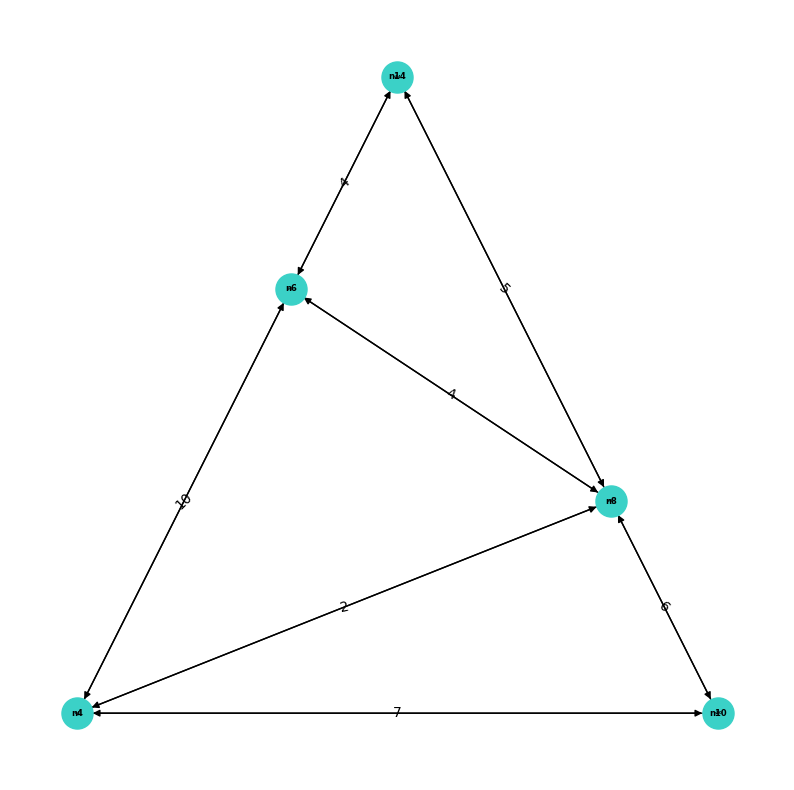

In [20]:
from tkinter import font
import networkx as nx
import matplotlib.pyplot as plt
import math
#-------------------------------------------------------helper functions from previous lab------------------------------------------------------------------#
def Init_Graph(Nodes):
    #takes nodes in the list format , for example [1,3,5,7,9] and initializes a directed graph
    G = nx.MultiDiGraph()
    G.add_nodes_from(Nodes)
    return G
def Add_Node(G,Node):
    #takes an initialized graph and a node and adds the node to the graph
    G.add_node(Node)

def Add_Edges(G,Edge, Weight=1):
    #takes an initialized graph 
    #and an edge or edge list in the list of tubles(start,end) form, for example [(1,5), (7,9), (1,9)]
    #and a shared weigh, by default 1
    G.add_edges_from(Edge, weight=Weight)

def Get_Nodes(G):
    #returns the list of nodes
    return list(G.nodes)

def Get_Edges(G):
    #returns a dictionary of Edges and their weights
    #for example:{(1, 5): 3, (1, 9): 3, (7, 9): 3}
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    return edge_labels

def Get_Out_Nodes(G,Node):
    #return a list of all the directly connected nodes out from a given node, for example [3,5]
    #the directly connected nodes [A,B] , mean that there is an edge starts from 'A' and ends at 'B'
    #i.e the incoming nodes towards 'Node' are not listed here
    #if there isnt any, the list will be empty []
    return list(G.adj[Node])

def Get_Out_Edges(G,Node):
     #return a dictionary of all the directly connected edges out from a given node and their weights
    nodeslist=Get_Out_Nodes(G,Node)
    edgesdic={}
    edge_labels=Get_Edges(G)
    for item in nodeslist:
        edgesdic[((Node,item))]=edge_labels[(Node,item)]
    return edgesdic

def Print_Graph(G,red_edges=[]):
    #takes a graph and a list of red edges
    plt.figure(figsize=(10,10))
    edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
    pos = nx.planar_layout(G, 14)
    nx.draw_networkx_nodes(G, pos, node_size= 10)
    nx.draw_networkx_labels(G, pos,font_weight='bold', font_size=3)
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G,pos, with_labels=True, font_weight='bold',edge_color=edge_colors,arrowsize=10,node_color='#3bd1c7', node_size=500, font_size=6, font_color='black')
    plt.savefig("filename.png")

def construct_graph_example():
    G1=Init_Graph(['n4','n6','n8','n10','n14'])
    # Add_Node(G1,'jyjyry4')
    Add_Edges(G1,[('n8','n4'),('n4','n8')],2)
    Add_Edges(G1,[('n6','n8'),('n8','n6'), ('n6','n14'),('n14','n6')],4)
    Add_Edges(G1,[('n8','n10'),('n10','n8')],6)
    Add_Edges(G1,[('n8','n14'),('n14','n8')],5)
    Add_Edges(G1,[('n6','n4'),('n4','n6')],10)
    Add_Edges(G1,[('n4','n10'),('n10','n4')],7)
    Print_Graph(G1)
    print("The graph nodes are ", type(Get_Nodes(G1)), Get_Nodes(G1))
    print("List of edges:", type(Get_Edges(G1)),Get_Edges(G1))
    print("Example of function Get_Out_Nodes with node n6", Get_Out_Nodes(G1,'n6'))
    print("Example of function Get_Out_Edges with node n6",Get_Out_Edges(G1,'n6'))
    return G1
G1=construct_graph_example()

In [17]:
import re
# print(actions)
def get_within_square_brackets(text):
    pattern = r'\[(.*?)\]'
    matches = re.findall(pattern, text)
    return matches

G1 = Init_Graph([])
for action in actions:
    singleEdit = get_within_square_brackets(action[1][0])
    print(singleEdit)
    executedAction = singleEdit[0]
    G1.add_node(singleEdit[0])

    if (executedAction == 'Insert'):
        
        G1.add_node(singleEdit[1])
        G1.add_edge(singleEdit[0], singleEdit[1], weight=singleEdit[2])
        # G1.add_node(singleEdit[3])
        # Add_Edges(G1, [(singleEdit[0], singleEdit[1])], singleEdit[2])
    elif (executedAction == 'Delete'):
        G1.add_node(singleEdit[2])
        # G1.add_node(singleEdit[3])
        Add_Edges(G1, [(singleEdit[0], singleEdit[2])], singleEdit[1])
    elif (executedAction == 'Update'):
        print("WEEEEEEEEEEEEEEEEeeeeeeeeeeeeeeeeeee")
        G1.add_node(singleEdit[2])
        # G1.add_node(singleEdit[3])
        Add_Edges(G1, [(singleEdit[0], singleEdit[2])], singleEdit[1])

Print_Graph(G1)
print(G1.graph)


NameError: name 'Init_Graph' is not defined

# Bleu

In [13]:
from nltk.translate.bleu_score import sentence_bleu
reference = data[111]["before"].split()
# reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
# candidate = ['this', 'is', 'a', 'gteet']
candidate = data[111]["after"].split()
score = sentence_bleu(reference, candidate, weights= [1])
print(score)

0.22727272727272727


In [17]:
from keyword import iskeyword


string_test = "except XMPPError : log . debug ( 'Could not retrieve vCard for %s' % jid )"

keyword_index = 0
attribute_index = 0

splitted = string_test.split()
for i, s in enumerate(splitted):
    if iskeyword(s):
        splitted[i]
        print(s)

except
not
for


In [31]:
import code_tokenize as ctok
# from tokenizer import tokenize
from nltk.tokenize import word_tokenize  
tok = word_tokenize(string_test)
# res = tokenize(string_test)
# res2 = []
# for r in res:
#     print(r.txt)
#     res2.append(r)
# res3 = " ".join(res2)
res = " ".join(tok)
print(tok)

['except', 'XMPPError', ':', 'log', '.', 'debug', '(', "'Could", 'not', 'retrieve', 'vCard', 'for', '%', 's', "'", '%', 'jid', ')']


In [16]:
from inspect import currentframe, getframeinfo
frameinfo = getframeinfo(currentframe()); locals()['a7a'] = (frameinfo.lineno); print(locals())
print((locals()['a7a']))

2


In [12]:
print(locals()['a7a'].lineno)

2
